In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import cv2

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")
model.save("mnist_cnn_improved.keras")

def preprocess_image(img_path):
    try:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)        
        if img is None:
            img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
            img = image.img_to_array(img)
            img = img.reshape(28, 28)
        else:
            img = cv2.resize(img, (28, 28))
        img = img / 255.0
        if np.mean(img) > 0.5:  
            img = 1 - img
        img = np.where(img > 0.3, 1.0, 0.0)
        img = img.reshape(1, 28, 28, 1)        
        return img
    except Exception as e:
        print(f"Error dalam preprocessing: {str(e)}")
        return None

def predict_digit(img_path, model):
    try:
        img_array = preprocess_image(img_path)
        if img_array is None:
            print("Gagal memproses gambar")
            return None, 0
        prediction = model.predict(img_array, verbose=0)
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        try:
            original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if original_img is not None:
                plt.imshow(original_img, cmap='gray')
            else:
                original_img = image.load_img(img_path, color_mode='grayscale')
                plt.imshow(original_img, cmap='gray')
        except:
            print("Tidak bisa menampilkan gambar asli")
        
        plt.title('Gambar Asli')
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.imshow(img_array.reshape(28, 28), cmap='gray')
        plt.title(f'Setelah Preprocessing')
        plt.axis('off')        
        plt.subplot(1, 3, 3)
        digits = range(10)
        probabilities = prediction[0] * 100
        bars = plt.bar(digits, probabilities)
        bars[predicted_digit].set_color('red')
        plt.title(f'Prediksi: {predicted_digit} ({confidence:.1f}%)')
        plt.xlabel('Digit')
        plt.ylabel('Probabilitas (%)')
        plt.xticks(digits)
        
        plt.tight_layout()
        plt.show()
        
        print("Probabilitas per kelas:")
        for i, prob in enumerate(prediction[0]):
            print(f"Digit {i}: {prob:.4f} ({prob*100:.1f}%)")
        
        if confidence < 70:
            print(f"\n⚠️  Peringatan: Confidence rendah ({confidence:.1f}%)")
            print("Kemungkinan penyebab:")
            print("- Gambar tidak jelas/blur")
            print("- Angka tidak terpusat")
            print("- Kontras rendah")
            print("- Gaya penulisan sangat berbeda dari dataset MNIST")
        
        return predicted_digit, confidence
        
    except Exception as e:
        print(f"Error dalam prediksi: {str(e)}")
        return None, 0

def test_prediction(img_path):
    try:
        model = keras.models.load_model("mnist_cnn_improved.keras")
        print("Model berhasil dimuat!")
        predicted_digit, confidence = predict_digit(img_path, model)
        if predicted_digit is not None:
            print(f"\n📊 Hasil Prediksi: {predicted_digit}")
            print(f"🎯 Confidence: {confidence:.1f}%")
        
    except Exception as e:
        print(f"Error: {str(e)}")
        print("Pastikan model sudah dilatih dan file gambar tersedia")



Epoch 1/10


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8540 - loss: 0.4493 - val_accuracy: 0.9858 - val_loss: 0.0492
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9782 - loss: 0.0763 - val_accuracy: 0.9887 - val_loss: 0.0413
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9829 - loss: 0.0579 - val_accuracy: 0.9900 - val_loss: 0.0369
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9869 - loss: 0.0457 - val_accuracy: 0.9907 - val_loss: 0.0351
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9892 - loss: 0.0349 - val_accuracy: 0.9908 - val_loss: 0.0364
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9910 - loss: 0.0298 - val_accuracy: 0.9917 - val_loss: 0.0348
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9926 - loss: 0.0250 - val_accuracy: 0.9917 - val_loss: 0.0317
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9931 - loss: 0.0224 - 

In [29]:
def prediksi_angka(model, img_path):
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # (1, 28, 28, 1)
    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title(f"Prediksi angka: {predicted_digit}")
    plt.axis('off')
    plt.show()
    
    return predicted_digit


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


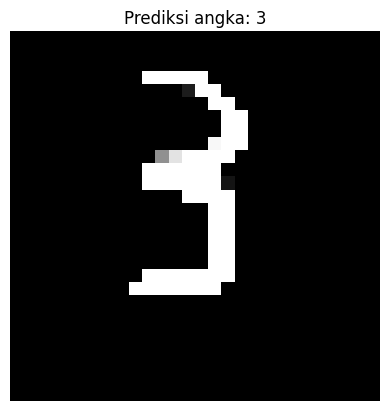

Model memprediksi angka: 3


In [34]:
hasil = prediksi_angka(model, "testAngka3.png")
print("Model memprediksi angka:", hasil)
